# TP1 du module 6 : les algorithmes de classification

Dans ce TP, nous allons mettre en pratique les principes de l'apprentissage supervisé. Objectifs :
* Savoir mettre en place les principaux algorithmes de classification
* Etudier l'impact de leurs paramètres sur leurs performances
* Comparer les performances de différents algorithmes

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Commencez par charger à nouveau le jeu de données Titanic, à partir du csv généré dans le TP1 du module 4. Préparez les données d'entraînement et de test qui seront utilisées par la suite.

In [5]:
titanic = pd.read_csv('Titanic.csv')

X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Partie 1 : découvrir Naive Bayes

1. Commencez par créer un modèle basé sur Naive Bayes, sans changer les paramètres par défaut, en supposant que la répartition des données correspond à une Gaussienne (loi normale). Entraînez-le et testez-le. Quelle score (accuracy) obtenez-vous ? Que pouvez-vous dire de la précision et du rappel ? Comparez avec les scores obtenus sur les arbres de décision au module 5 : avez-vous des hypothèses pour expliquer cette différence ?

In [6]:
scores = {}

gnb = GaussianNB()

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))

scores['GNB'] = (accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred))

Accuracy : 0.6424581005586593
Precision : 0.7857142857142857
Recall : 0.1527777777777778


**Observations** : Le score d'accuracy est faible, d'autant plus en comparaison des performances de l'arbre de décision. Il est possible que l'hypothèse d'indépendance des données ne soit pas adaptée pour le Titanic.

2. Affichez une matrice de corrélation des données du jeu d'entraînement, en y incluant un affichage textuel de la valeur de la corrélation. Voyez-vous des informations permettant d'expliquer les performance de l'algorithme Naive Bayes ?

<Axes: >

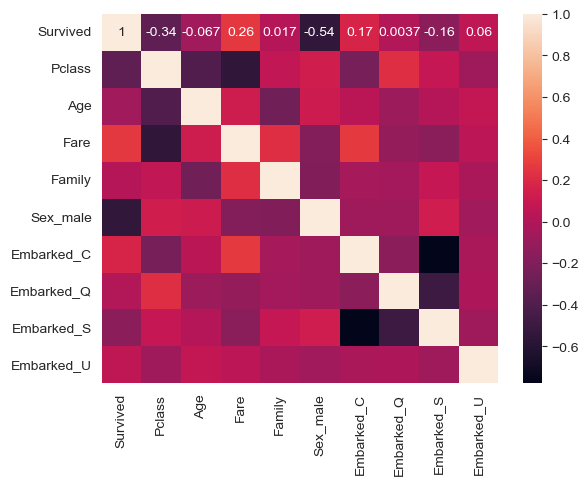

In [7]:
sns.heatmap(titanic.corr(), annot=True)

**Observations** : On observe que certaines données sont bien corrélées entre elles et donc que l'hypothèse de l'indépendance des variables est mise à mal, il faut utiliser un autre algorithme.

3. Proposez une représentation graphique des attributs continus, permettant de vérifier l'hypothèse que nous avons faite, selon laquelle ces données suivent une loi normale (Gaussienne).

C:\Users\bvannier2021\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bvannier2021\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


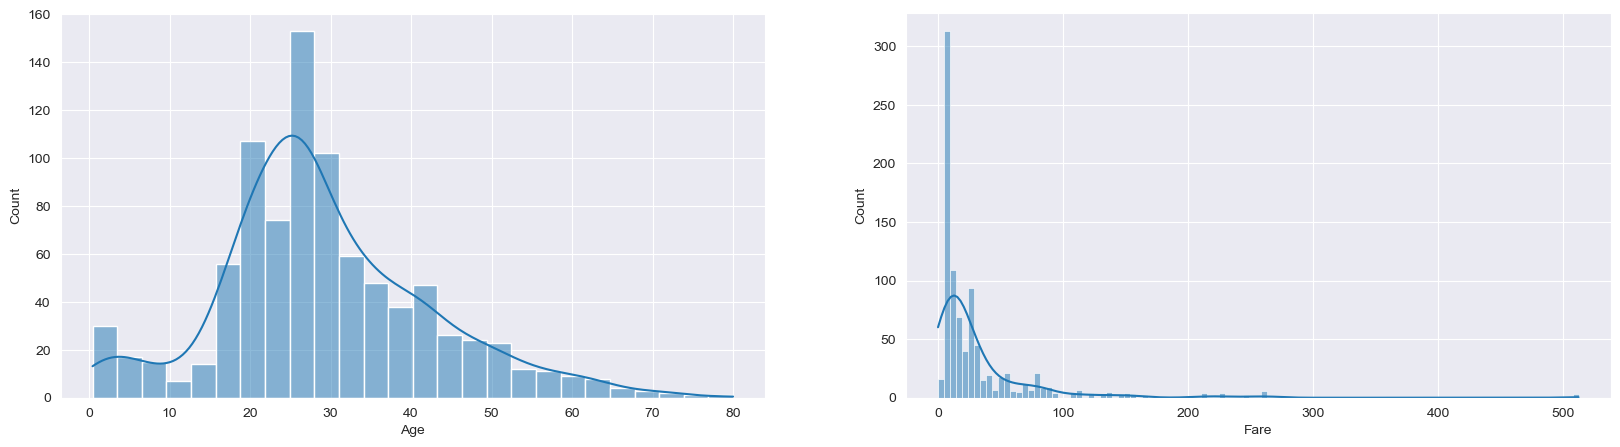

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
index = 0
for attribute in ['Age', 'Fare']:
    sns.histplot(data=X, x=attribute, kde=True, ax=axes[index])
    index += 1

**Observations** : Les valeurs continues ont la forme de la cloche caractéristique de la loi normale. Elles ne sont toutefois pas parfaite, notamment pour le prix du billet ce qui explique un score relativement faible.

## Partie 2 : découvrir KNN

1. Commencez par créer un modèle knn, en gardant le nombre de voisins par défaut (à regarder dans la documentation). Que pouvez-vous dire de l'accuracy, de la précision et du rappel ?

In [9]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# print("Accuracy :", accuracy_score(y_test, y_pred))
print("Accuracy :", knn.score(X_test, y_test))
print("Precision :", precision_score(y_test, y_pred))
print("Rappel :", recall_score(y_test, y_pred))

Accuracy : 0.7318435754189944
Precision : 0.7222222222222222
Rappel : 0.5416666666666666


**Observations** : On observe que les résultats de la précision et du rappel sont meilleurs, indiquant que la classification effectuée par le modèle est plus performante que le modèle 'Gaussian Naive-Bayes'.

2. Nous allons maintenant observer l'impact du nombre de voisins à prendre en considération. Faite varier k entre 1 et 20. Calculez à chaque fois accuracy, précision, et rappel. Tracez l'évolution de ces trois scores en fonction de k, sur un même graphique. Que constatez-vous ? Affichez la valeur de k pour laquelle l'accuracy est la plus élevée.

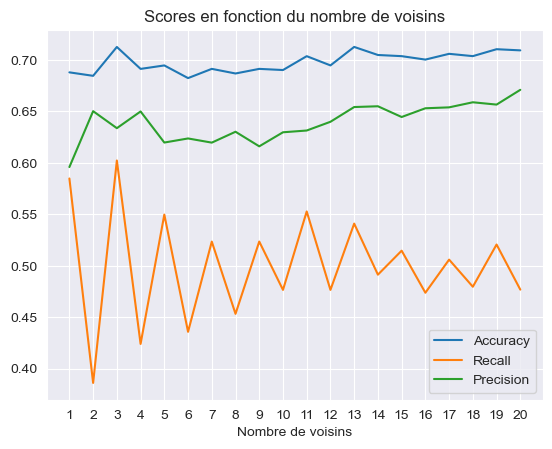

In [10]:
accuracies = []
precisions = []
recalls = []

k_range = range(1, 21)

for n_neighbors in k_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    accuracies.append(cross_validate(knn, X, y, scoring={'accuracy'}, cv=5)['test_accuracy'].mean())
    recalls.append(cross_validate(knn, X, y, scoring={'recall'}, cv=5)['test_recall'].mean())
    precisions.append(cross_validate(knn, X, y, scoring={'precision'}, cv=5)['test_precision'].mean())
    
plt.plot(k_range, accuracies, label='Accuracy')
plt.plot(k_range, recalls, label='Recall')
plt.plot(k_range, precisions, label='Precision')
plt.title("Scores en fonction du nombre de voisins")
plt.xlabel("Nombre de voisins")
plt.xticks(k_range)
plt.legend()
plt.show()

**Observations** : L'accuracy et la precision sont relativement stables. Le recall fluctue fortement, il est le plus élevé pour k = 3, c'est le nombre de voisins optimal que l'on choisira.

3. En prenant la valeur de k qui vous semble la plus pertinente, faite varier la dimension (p) utilisée pour calculer la distance de Minkowski entre deux données. Cette distance a-t'elle un fort impact sur les résultats d'accuracy obtenus ? Montrez-le en montrant l'évolution de ce score en fonction de p (faire varier entre 1 et 10). Ajoutez également la précision et le rappel.

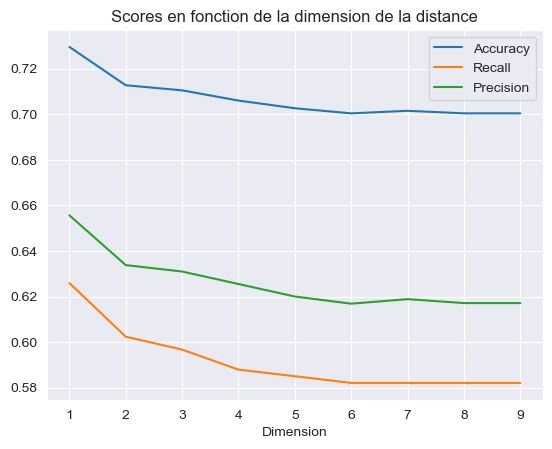

In [11]:
k_best = 3

p_range = range(1, 10)

accuracies = []
recalls = []
precisions = []

for p in p_range:
    knn = KNeighborsClassifier(n_neighbors=k_best, p=p)
    accuracies.append(cross_validate(knn, X, y, scoring={'accuracy'}, cv=5)['test_accuracy'].mean())
    recalls.append(cross_validate(knn, X, y, scoring={'recall'}, cv=5)['test_recall'].mean())
    precisions.append(cross_validate(knn, X, y, scoring={'precision'}, cv=5)['test_precision'].mean())
    
plt.plot(p_range, accuracies, label='Accuracy')
plt.plot(p_range, recalls, label='Recall')
plt.plot(p_range, precisions, label='Precision')
plt.title("Scores en fonction de la dimension de la distance")
plt.xlabel("Dimension")
plt.xticks(p_range)
plt.legend()
plt.show()

In [12]:
best_dimension = np.argmax(accuracies) + 1
print("La meilleure dimension est pour p =", best_dimension)

La meilleure dimension est pour p = 1


In [27]:
knn = KNeighborsClassifier(n_neighbors=k_best, p=1)
scores['KNN'] =  (
    cross_validate(knn, X, y, scoring={'accuracy'}, cv=5)['test_accuracy'].mean(), 
    cross_validate(knn, X, y, scoring={'recall'}, cv=5)['test_recall'].mean(), 
    cross_validate(knn, X, y, scoring={'precision'}, cv=5)['test_precision'].mean()
)

## Partie 3 : découvrir les SVM

1. Créez un modèle de classification basée sur les machines à vecteur de support. Dans un premier temps, gardez les options par défaut. Que pouvez-vous dire des performances obtenues (accuracy, précision, rappel) ?

In [14]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))

Accuracy : 0.6424581005586593
Recall : 0.18055555555555555
Precision : 0.7222222222222222


**Observations :** L'accuracy est assez faible. Le recall est très faible, le nombre de données de test prédites en faux négatifs est trop élevé.

2. Testez les différents noyaux disponibles pour l'algorithme SVM (linéaire, polynomial, rbf et sigmoïde). Représentez graphiquement l'accuracy, la précision et le rappel, pour chaque noyau. Il y en a t'il un qui semble plus pertinent que les autres ? Affichez-le, ainsi que les scores obtenus pour ce noyau.

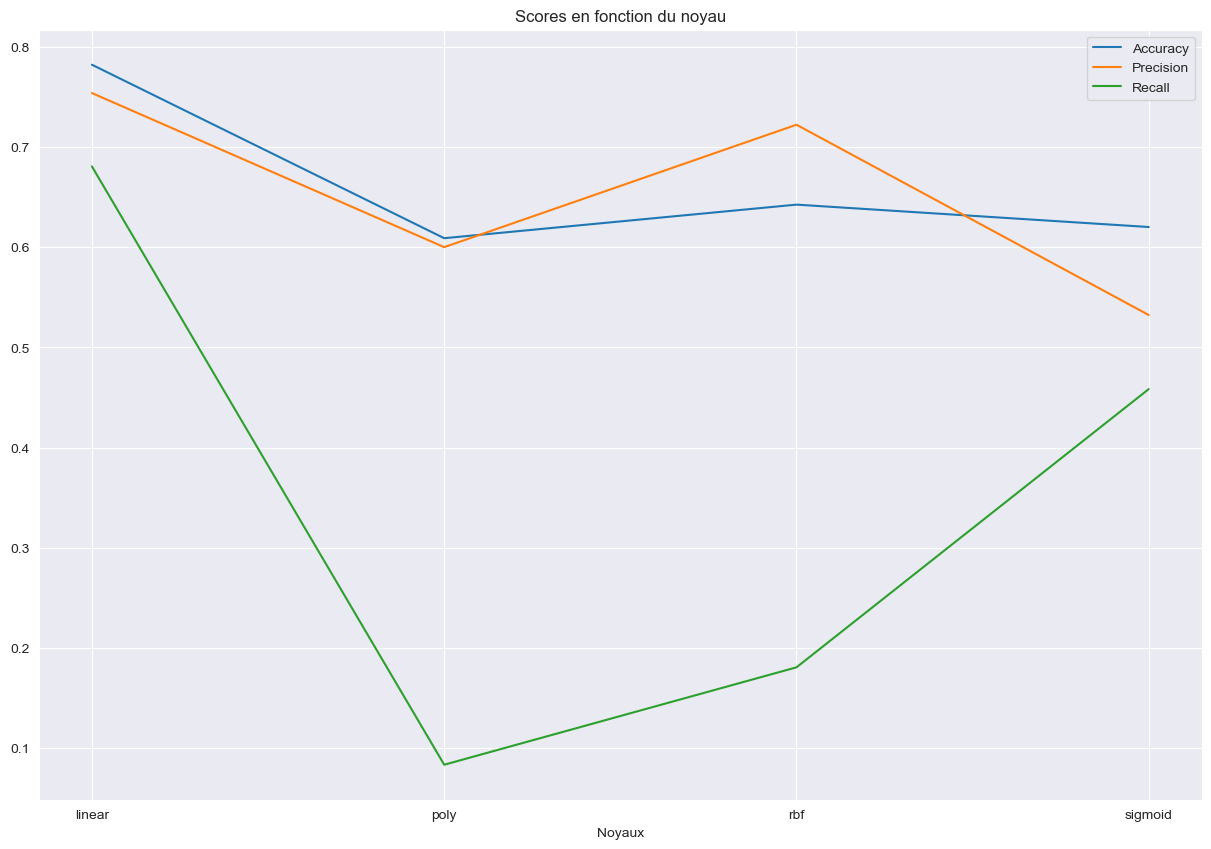

In [15]:
fig = plt.subplots(figsize=(15, 10))

kernels = ('linear', 'poly', 'rbf', 'sigmoid')

accuracies = []
precisions = []
recalls = []

for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    
plt.plot(kernels, accuracies, label='Accuracy')
plt.plot(kernels, precisions, label='Precision')
plt.plot(kernels, recalls, label='Recall')
plt.xlabel("Noyaux")
plt.legend()
plt.title("Scores en fonction du noyau")
plt.show()

**Observations** : Le meilleur noyau est le `linear`.

3. Nous allons essayer d'améliorer les performances obtenues avec le noyau polynomial. Utilisez ce noyau, et faites varier le degré du polynôme utilisé de 1 à 10. Représentez graphiquement l'accuracy, la précision et le rappel, en fonction du degré du polynôme. Il y en a t'il un qui semble plus pertinent que les autres ? Affichez-le, ainsi que les scores obtenus pour cette valeur. Comparez avec le meilleur score obtenu à la question précédente.

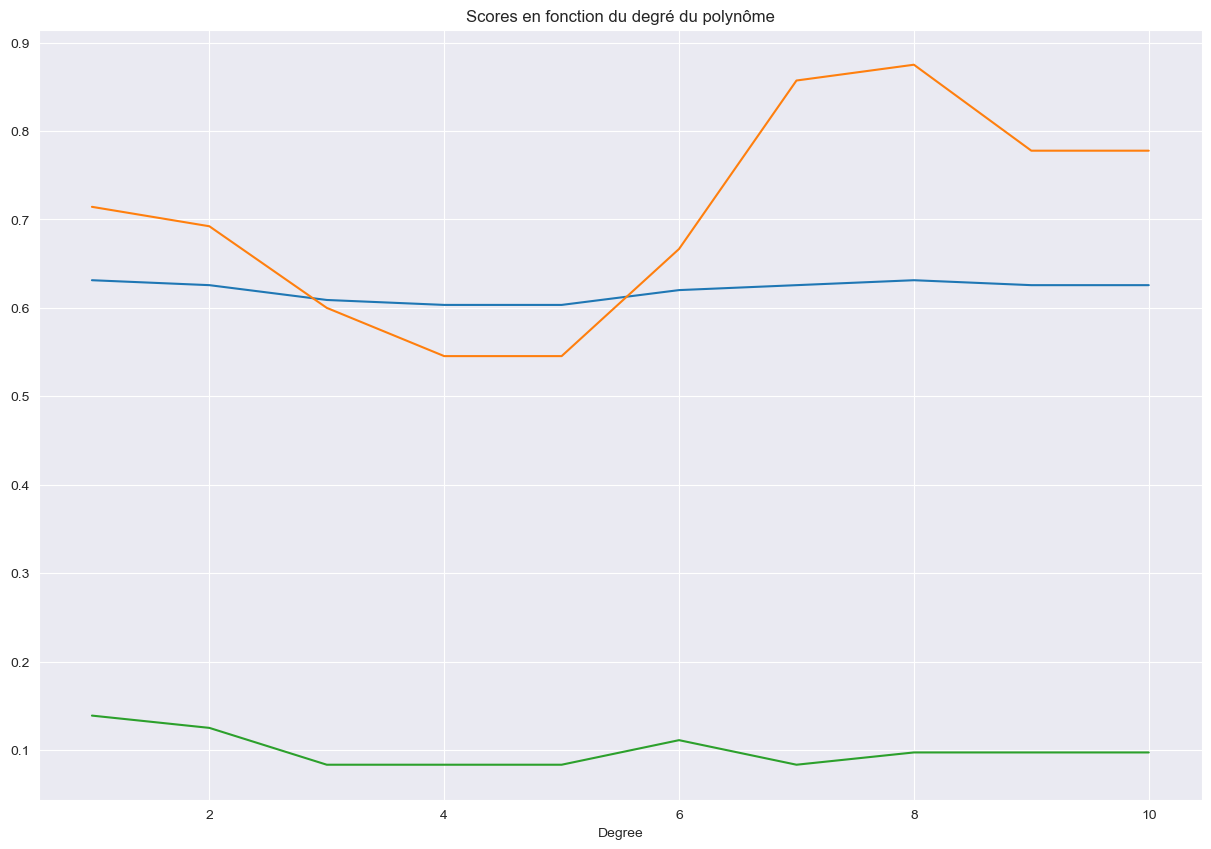

In [16]:
fig = plt.subplots(figsize=(15, 10))

degrees = range(1, 11)

accuracies = []
precisions = []
recalls = []

for degree in degrees:
    svm = SVC(kernel='poly', degree=degree)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    
plt.plot(degrees, accuracies, label='Accuracy')
plt.plot(degrees, precisions, label='Precision')
plt.plot(degrees, recalls, label='Recall')
plt.title("Scores en fonction du degré du polynôme")
plt.xlabel("Degree")
plt.show()

**Observations** : Le meilleur degré de polynôme est 8. Son score est meilleur que le kernel `linear`.

In [17]:
svm = SVC(kernel='poly', degree=8)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
scores['SVM'] = (accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred))

## Partie 4 : découvrir les réseaux de neurones

1. Commençons par étudier le réseau le plus simple : un perceptron. A l'aide de la classe `sklearn.linear_model.Perceptron`, créez un perceptron, en gardant les options par défaut. Affichez accuracy, précision et rappel : que pensez-vous de ces performances ?

In [18]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()

perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("Rappel :", recall_score(y_test, y_pred))

Accuracy : 0.6368715083798883
Precision : 0.5299145299145299
Rappel : 0.8611111111111112


**Observations** : Le score n'est pas aussi bon que pour le SVM polynômial.

2. Regardez la documentation pour créer un réseau de neurones (`sklearn.neural_network.MLPClassifier`) : quelle est la structure d'un réseau de neurones par défaut avec scikit-learn ? Combien de couches cachées ? Combien de neurones par couche ?

**Observations** : En regardant la documentation, par défaut il y a une seule couche cachée de 100 neurones.

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

2. Créer un réseau de neurones, en gardant ces options par défaut. Affichez accuracy, précision et rappel : que pensez-vous de ces performances, notamment en comparant par rapport au perceptron ? Avez-vous un message d'alerte ?

In [19]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier()

ann.fit(X_train, y_train)
y_pred = ann.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))

Accuracy : 0.7988826815642458
Precision : 0.8
Recall : 0.6666666666666666


**Observations** : L'accuracy est meilleure et il y a moins de faux négatifs et de faux positifs que pour le perceptron seul. Il y a un message d'alerte signalant que malgré un maximum d'iterations atteint l'optimisation n'a pas encore convergé.

3. Si vous avez observé un message d'alerte sur la question précédent, que signifie-t'il selon vous ? Que pouvez-vous faire pour y remédier ? Proposez un code permettant d'obtenir des résultats, sans message d'alerte. Qu'observez-vous sur l'évolution des scores ?

**Observations** : Le message d'erreur souligne que ke modèle n'a pas eu suffisamment d'itérations pour converger vers le taux d'erreur optimal. On peut soit augmenter le nombre d'itérations, soit changer l'architecture du réseau de neurones ou soit augmenter le taux d'apprentissage.

In [20]:
ann = MLPClassifier(max_iter=300)

ann.fit(X_train, y_train)
y_pred = ann.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))

Accuracy : 0.8156424581005587
Precision : 0.7910447761194029
Recall : 0.7361111111111112


**Observations** : L'accuracy est un peu plus faible mais nombre de faux positifs et de faux négatifs plus petit.

4. Nous allons à présent comparer différentes architectures du réseau de neurones :
- Trois couches de 50 neurones chacune
- Cinq couches de 50 neurones chacune
- Trois couches : première avec 50, deuxième avec 100, troisième avec 50 neurones
- Cinq couches : première avec 50, deuxième avec 100, troisième avec 50 neurones, quatrième avec 100, cinquième avec 50 neurones

Représentez graphiquement l'accuracy, la précision et le rappel, pour chaque architecture. Il y en a t'il une qui semble plus pertinente que les autres ? Affichez-la, ainsi que les scores obtenus pour cette architecture. Comparez avec le score obtenu par l'architecture par défaut. Votre code ne doit générer aucun message d'alerte.

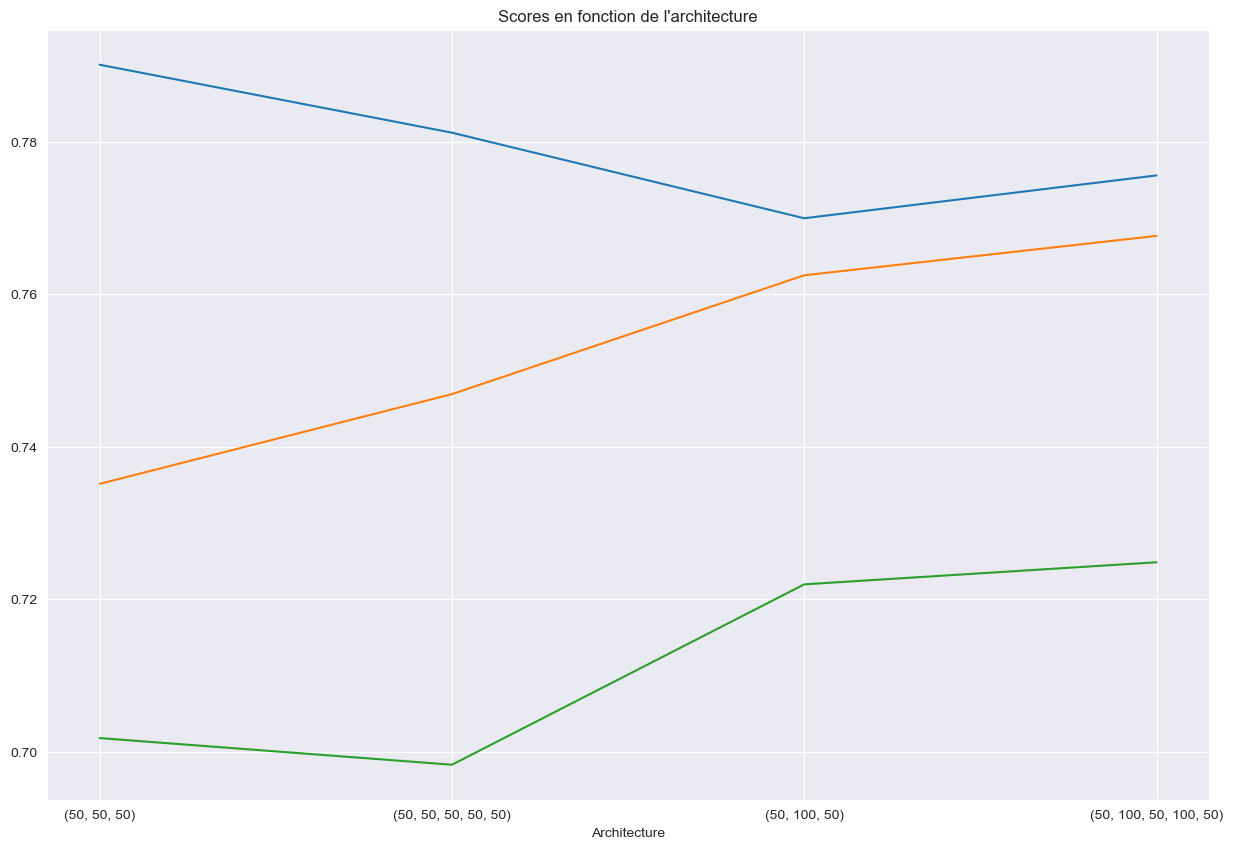

In [21]:
fig = plt.subplots(figsize=(15, 10))

architectures = ((50, 50, 50), (50, 50, 50, 50, 50), (50, 100, 50), (50, 100, 50, 100, 50))
labels = ("(50, 50, 50)", "(50, 50, 50, 50, 50)", "(50, 100, 50)", "(50, 100, 50, 100, 50)")

accuracies = []
precisions = []
recalls = []

for architecture in architectures:
    ann = MLPClassifier(hidden_layer_sizes=architecture, max_iter=300)
    accuracies.append(cross_validate(ann, X, y, scoring={'accuracy'}, cv=5)['test_accuracy'].mean())
    precisions.append(cross_validate(ann, X, y, scoring={'precision'}, cv=5)['test_precision'].mean())
    recalls.append(cross_validate(ann, X, y, scoring={'recall'}, cv=5)['test_recall'].mean())
    # ann.fit(X_train, y_train)
    # y_pred = ann.predict(X_test)
    # accuracies.append(accuracy_score(y_test, y_pred))
    # precisions.append(precision_score(y_test, y_pred))
    # recalls.append(recall_score(y_test, y_pred))
    
plt.plot(labels, accuracies, label='Accuracy')
plt.plot(labels, precisions, label='Precision')
plt.plot(labels, recalls, label='Recall')
plt.title("Scores en fonction de l'architecture")
plt.xlabel("Architecture")
plt.xticks(labels)
plt.show()

**Observations** : La meilleure architecture est (50, 100, 50, 100, 50).

5. En utilisant l'architecture qui vous donnait les meilleures performances, étudier l'impact de la fonction d'activation utilisée sur les performances. Représentez sur un graphiques les scores (accuracy, précision et rappel) obtenus pour les quatres fonctions d'activation proposées par scikit-learn. Affichez la fonction qui vous parait la plus pertinente, ainsi que les scores associés.

C:\Users\bvannier2021\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\bvannier2021\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


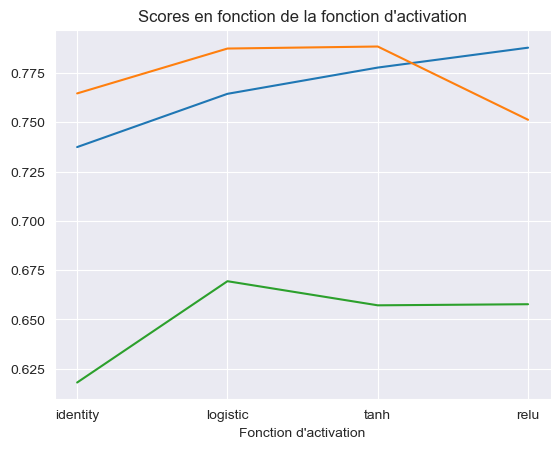

In [22]:
best_architecture = (50, 100, 50, 100, 50)

activations = ('identity', 'logistic', 'tanh', 'relu')

accuracies = []
precisions = []
recalls = []

for activation in activations:
    ann = MLPClassifier(hidden_layer_sizes=best_architecture, max_iter=300, activation=activation)
    accuracies.append(cross_validate(ann, X, y, scoring={'accuracy'}, cv=5)['test_accuracy'].mean())
    precisions.append(cross_validate(ann, X, y, scoring={'precision'}, cv=5)['test_precision'].mean())
    recalls.append(cross_validate(ann, X, y, scoring={'recall'}, cv=5)['test_recall'].mean())

plt.plot(activations, accuracies, label='Accuracy')
plt.plot(activations, precisions, label='Precision')
plt.plot(activations, recalls, label='Recall')
plt.title("Scores en fonction de la fonction d'activation")
plt.xlabel("Fonction d'activation")
plt.xticks(activations)
plt.show()

**Observations** : On voit bien que l'accuracy est plus élevé pour la fonction d'activation `logistic` mais son recall est assez bas. Le meilleur compromis semble être la fonction d'activation `tanh`.

In [23]:
ann = MLPClassifier(hidden_layer_sizes=best_architecture, max_iter=300, activation='tanh')
scores['ANN'] = (
    cross_validate(ann, X, y, scoring={'accuracy'}, cv=5)['test_accuracy'].mean(), 
    cross_validate(ann, X, y, scoring={'precision'}, cv=5)['test_precision'].mean(),
    cross_validate(ann, X, y, scoring={'recall'}, cv=5)['test_recall'].mean()
)

## Partie 5 : comparer les performances des différents algorithmes

Nous allons à présent résumer les différentes performances des algorithmes que vous avez testé dans ce TP : récupérez les meilleurs scores (accuracy) obtenu pour chaque algorithme. Représentez-les sur un diagramme en barres, en regroupant par algorithme, et en représentant chaque score par une couleur. Un algorithme semble-t'il obtenir de meilleures performances que les autres ?

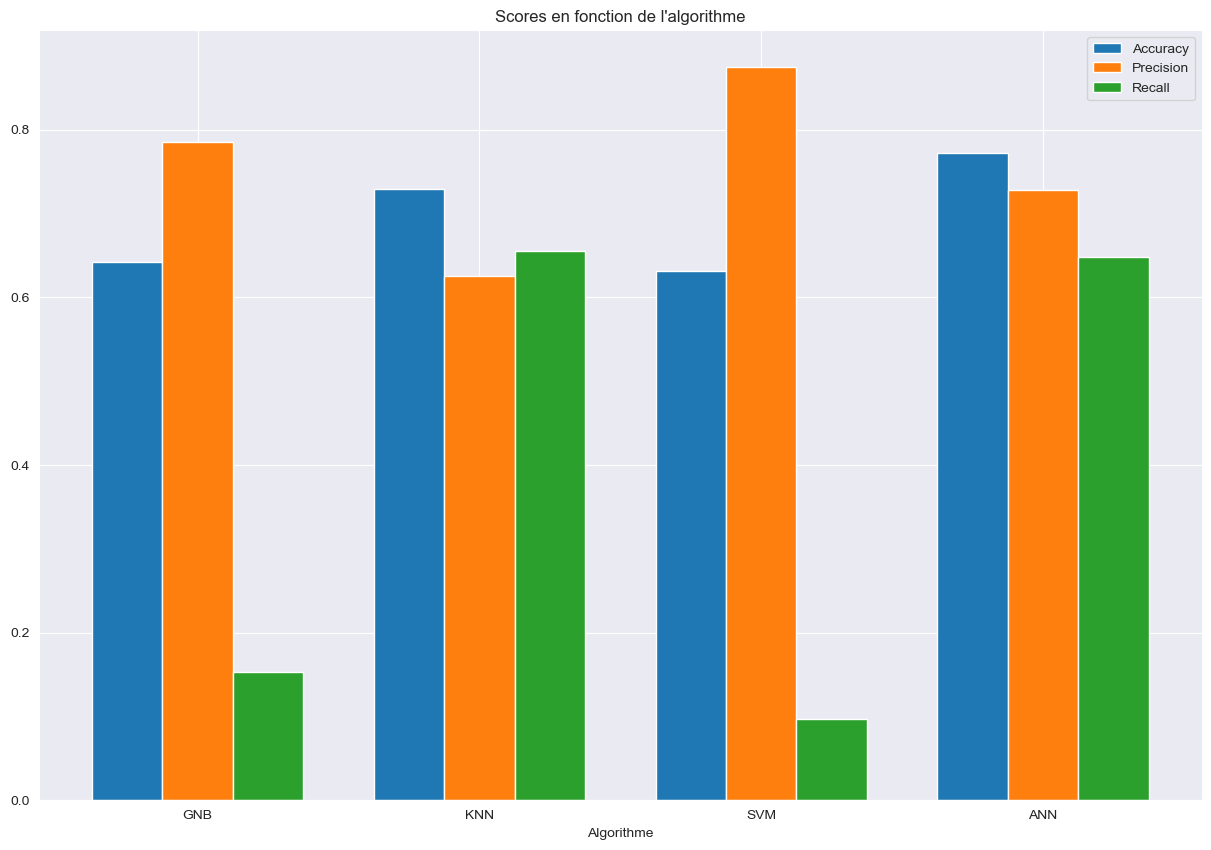

In [24]:
scores_2 = {
    'Accuracy' : (scores['GNB'][0], scores['KNN'][0], scores['SVM'][0], scores['ANN'][0]),
    'Precision' : (scores['GNB'][1], scores['KNN'][1], scores['SVM'][1], scores['ANN'][1]),
    'Recall' : (scores['GNB'][2], scores['KNN'][2], scores['SVM'][2], scores['ANN'][2]),
}

algos = ('GNB', 'KNN', 'SVM', 'ANN')

x = np.arange(len(algos))
width = 0.25

fig = plt.subplots(figsize=(15, 10))

plt.bar(x - width, scores_2['Accuracy'], width=width, label='Accuracy')
plt.bar(x, scores_2['Precision'], width=width, label='Precision')
plt.bar(x + width, scores_2['Recall'], width=width, label='Recall')
plt.title("Scores en fonction de l'algorithme")
plt.xlabel("Algorithme")
plt.xticks(x, algos)
plt.legend()
plt.show()

## Partie 6 : optimiser la recherche des paramètres optimaux

Dans ce TP, nous avons souvent cherché à identifier la meilleur combinaison de paramètres. Nous avons procédé par itération, en cherchant à fixer un paramètre avant de faire évoluer les autres. Cette méthode est couteuse, et pour faire une recherche exhaustive, nécessite, de répéter très souvent le même code. Scikit-learn propose une classe, `sklearn.model_selection.GridSearchCV`, qui va permettre d'optimiser cette recherche de paramétrage optimal.

Lien vers la documentation : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Le principe est de définir un dictionnaire, où la clé correspond à un paramètre, et la valeur à la liste de valeurs possibles à tester pour le paramètre considéré. 

**Consigne :** Appliquez ce principe pour déterminer la meilleure combinaison possible pour le réseau de neurones, en repartant des différentes configurations testées dans les parties précédentes.

In [25]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "hidden_layer_sizes" :[(50,50,50),(50,50,50,50,50),(50,100,50),(50,100,50,100,50),],
    "activation" : ['identity', 'logistic', 'tanh', 'relu']
}

ann = MLPClassifier(max_iter=1000)

ann = GridSearchCV(ann, parameters, cv=5, scoring='accuracy')

ann.fit(X_train, y_train)
y_pred = ann.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))

Accuracy : 0.7988826815642458
Precision : 0.725
Recall : 0.8055555555555556


In [26]:
print("Les meilleurs paramètres sont", ann.best_params_)
print("Le meilleur score obtenu est", ann.best_score_)

Les meilleurs paramètres sont {'activation': 'relu', 'hidden_layer_sizes': (50, 50, 50)}
Le meilleur score obtenu est 0.7976558652614991
